In [ ]:
!pip install bagpy
from bagpy import bagreader
from google.colab import drive
drive.mount('/content/drive')
bag_path = '/content/drive/MyDrive/I_trajectories.bag' #trzeba wladowac plik na dysk google, po tym i tak ciężko go obsluzyc bo łącznie z wypakowanymi danymi to bedzie zajmowalo 13gb xD $
#trzeba podac ścieżke na dysku

b = bagreader(bag_path)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.4/100.4 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.7/313.7 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for gnupg: filename=gnupg-2.3.1-py3-none-any.whl size=94614 sha256=198cd3e17c1664607647251f8f13f6ca94d1d23df1036344f70e351eb974a398
  Stored in directory: /root/.cache/pip/wheels/96/4a/73/180cbdac353bcb2d052618ece30442fd2d0b07df995b7e3

In [ ]:
print(b.topic_table)

                                     Topics                        Types  \
0                                 /gps_odom            nav_msgs/Odometry   
1                                /orb_slam3            nav_msgs/Odometry   
2                          /orb_slam3_phone            nav_msgs/Odometry   
3      /phone_camera/image_color/compressed  sensor_msgs/CompressedImage   
4  /pointgrey/camera/image_color/compressed  sensor_msgs/CompressedImage   

   Message Count  Frequency  
0           4215   7.993414  
1          10380  19.986010  
2          15290  30.000029  
3          15506  30.000029  
4          10543  19.986153  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import cv2

# /orb_slam3

In [ ]:
gps_csv_path = b.message_by_topic('/orb_slam3')
gps_df = pd.read_csv(gps_csv_path)
gps_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.627305e+09,0,1627305313,167266600,map,camera,0.464584,-0.201727,0.352797,-0.256658,...,0.678652,0.224964,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.627305e+09,1,1627305313,217666000,map,camera,0.389517,-0.280264,0.345286,-0.256096,...,0.678897,0.223371,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.627305e+09,2,1627305313,267173000,map,camera,0.333955,-0.369502,0.352140,-0.255717,...,0.678228,0.223163,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.627305e+09,3,1627305313,318715800,map,camera,0.269831,-0.454071,0.350840,-0.254992,...,0.677683,0.222428,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.627305e+09,4,1627305313,366856800,map,camera,0.203427,-0.538513,0.348546,-0.254233,...,0.677487,0.221341,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
print("** Liczba wierszy:", len(gps_df))
print("** Liczba kolumn:", gps_df.shape[1])

print("** Typy danych:\n", gps_df.dtypes)

** Liczba wierszy: 10380
** Liczba kolumn: 21
** Typy danych:
 Time                       float64
header.seq                   int64
header.stamp.secs            int64
header.stamp.nsecs           int64
header.frame_id             object
child_frame_id              object
pose.pose.position.x       float64
pose.pose.position.y       float64
pose.pose.position.z       float64
pose.pose.orientation.x    float64
pose.pose.orientation.y    float64
pose.pose.orientation.z    float64
pose.pose.orientation.w    float64
pose.covariance             object
twist.twist.linear.x       float64
twist.twist.linear.y       float64
twist.twist.linear.z       float64
twist.twist.angular.x      float64
twist.twist.angular.y      float64
twist.twist.angular.z      float64
twist.covariance            object
dtype: object


In [ ]:
print("** Liczba brakujących wartości:\n", gps_df.isnull().sum())

** Liczba brakujących wartości:
 Time                       0
header.seq                 0
header.stamp.secs          0
header.stamp.nsecs         0
header.frame_id            0
child_frame_id             0
pose.pose.position.x       0
pose.pose.position.y       0
pose.pose.position.z       0
pose.pose.orientation.x    0
pose.pose.orientation.y    0
pose.pose.orientation.z    0
pose.pose.orientation.w    0
pose.covariance            0
twist.twist.linear.x       0
twist.twist.linear.y       0
twist.twist.linear.z       0
twist.twist.angular.x      0
twist.twist.angular.y      0
twist.twist.angular.z      0
twist.covariance           0
dtype: int64


In [ ]:
print("** Liczba unikalnych wartości: \n", gps_df.nunique())

** Liczba unikalnych wartości: 
 Time                       10380
header.seq                 10380
header.stamp.secs            520
header.stamp.nsecs         10366
header.frame_id                1
child_frame_id                 1
pose.pose.position.x       10380
pose.pose.position.y       10380
pose.pose.position.z       10380
pose.pose.orientation.x    10380
pose.pose.orientation.y    10380
pose.pose.orientation.z    10380
pose.pose.orientation.w    10380
pose.covariance                1
twist.twist.linear.x           1
twist.twist.linear.y           1
twist.twist.linear.z           1
twist.twist.angular.x          1
twist.twist.angular.y          1
twist.twist.angular.z          1
twist.covariance               1
dtype: int64


In [ ]:
print("** Statystyki opisowe (numeryczne):\n", gps_df.describe())
print("** Statystyki opisowe (nienumeryczne):\n", gps_df.describe(include=['object']))

** Statystyki opisowe (numeryczne):
                Time    header.seq  header.stamp.secs  header.stamp.nsecs  \
count  1.038000e+04  10380.000000       1.038000e+04        1.038000e+04   
mean   1.627306e+09   5189.500000       1.627306e+09        5.002310e+08   
std    1.499339e+02   2996.592231       1.499351e+02        2.886410e+08   
min    1.627305e+09      0.000000       1.627305e+09        2.200000e+04   
25%    1.627305e+09   2594.750000       1.627305e+09        2.502091e+08   
50%    1.627306e+09   5189.500000       1.627306e+09        4.996693e+08   
75%    1.627306e+09   7784.250000       1.627306e+09        7.500429e+08   
max    1.627306e+09  10379.000000       1.627306e+09        9.999590e+08   

       pose.pose.position.x  pose.pose.position.y  pose.pose.position.z  \
count          10380.000000          10380.000000          10380.000000   
mean             -43.694912             83.153189            -11.021272   
std               97.439329             83.615253    

# Wyciąganie zdjęć (zajmie mega duzo miejsca)

In [ ]:
img_csv_path = b.message_by_topic('/pointgrey/camera/image_color/compressed')
img_df = pd.read_csv(img_csv_path)

print("*** Dane obrazowe:")
print(img_df.columns)
print(img_df.head())

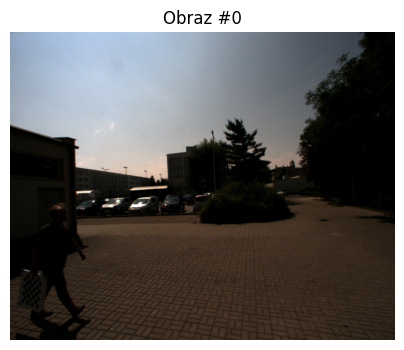

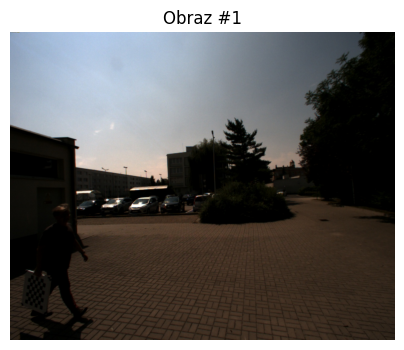

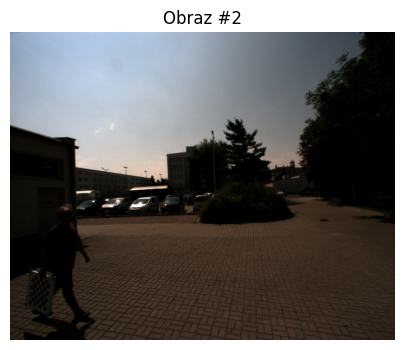

In [ ]:
import ast

def parse_image_bytes(row_data):
    try:
        byte_data = ast.literal_eval(row_data)
        byte_array = np.frombuffer(byte_data, dtype=np.uint8)
        img = cv2.imdecode(byte_array, cv2.IMREAD_COLOR)
        if img is not None:
            return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        else:
            return None
    except Exception as e:
        print(f"Błąd przy dekodowaniu: {e}")
        return None

num_images = 3
for i in range(min(num_images, len(img_df))):
    img = parse_image_bytes(img_df.iloc[i]['data'])
    if img is not None:
        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.title(f"Obraz #{i}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Nie udało się sparsować obrazu #{i}")

### Informacje podstawowe

## Histogramy zmiennych numerycznych

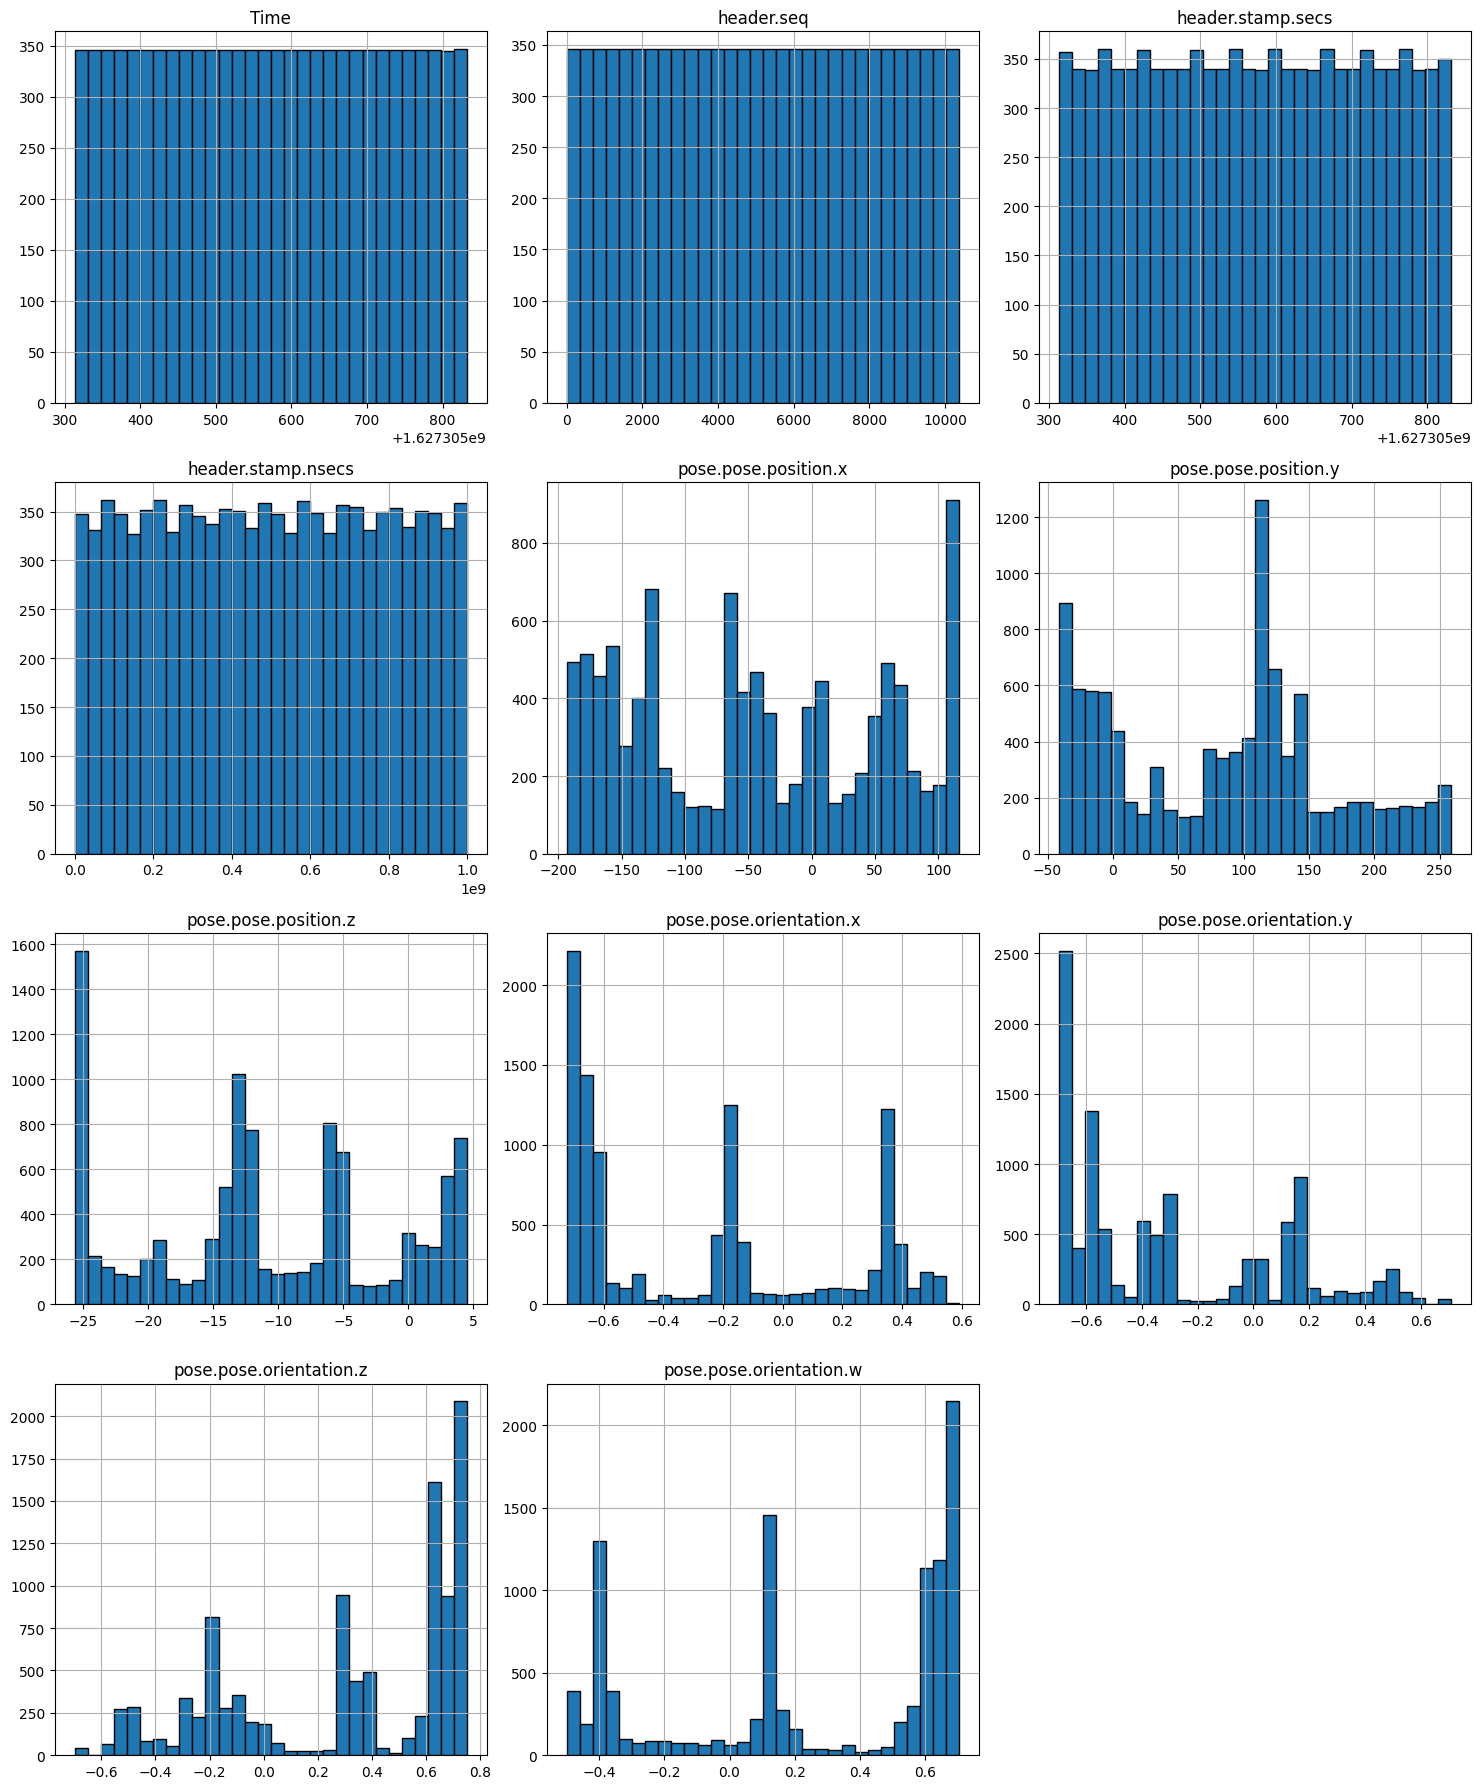

In [ ]:
#slam3

numeric_cols = gps_df.select_dtypes(include=['float64', 'int64']).columns
drop_twist = [col for col in numeric_cols if not col.startswith('twist')]

gps_df[drop_twist].hist(figsize=(15, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

## Macierz korelacji

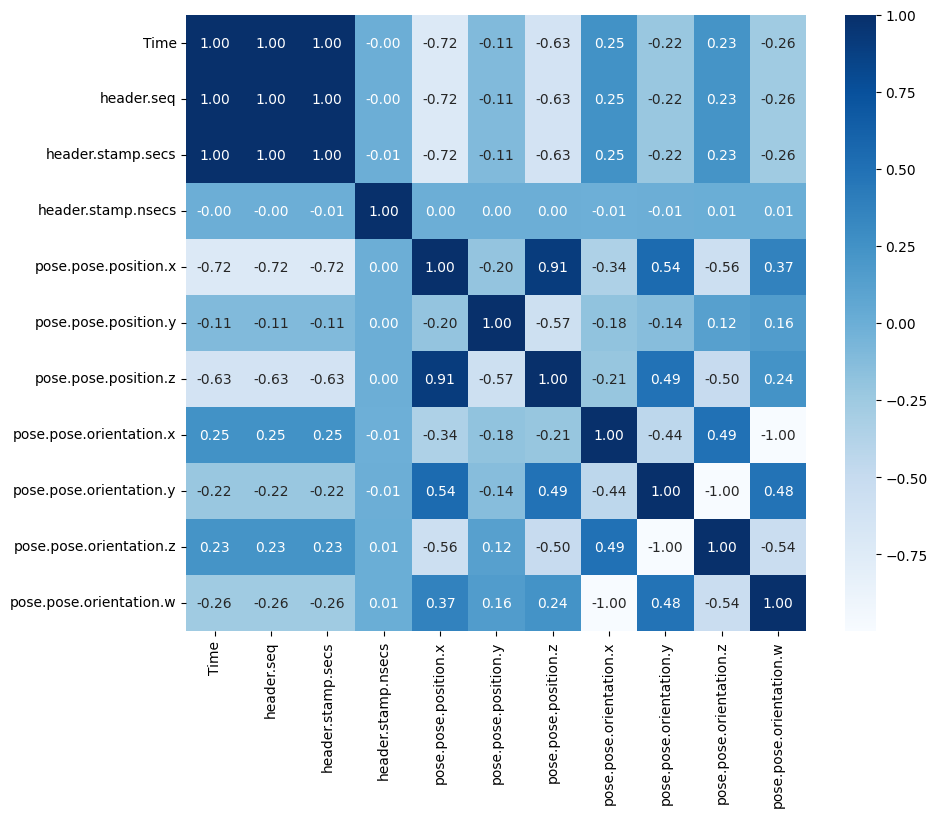

In [ ]:
#slam3


plt.figure(figsize=(10, 8))
sns.heatmap(gps_df[drop_twist].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

## Analiza outlierów

Time: Z-score outliers = 0, IQR outliers = 0


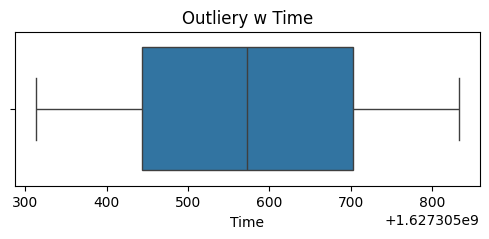

header.seq: Z-score outliers = 0, IQR outliers = 0


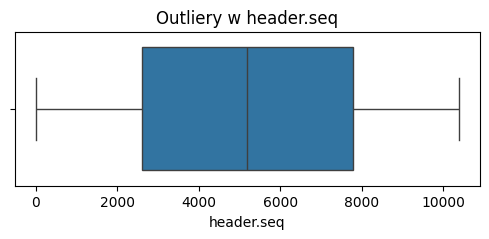

header.stamp.secs: Z-score outliers = 0, IQR outliers = 0


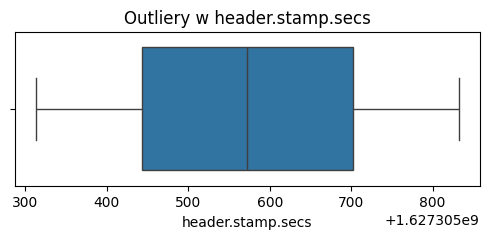

header.stamp.nsecs: Z-score outliers = 0, IQR outliers = 0


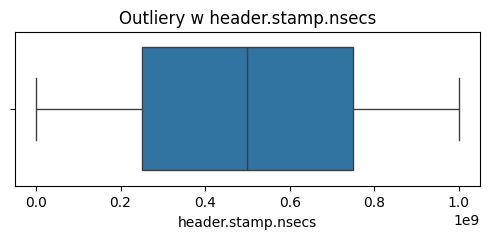

pose.pose.position.x: Z-score outliers = 0, IQR outliers = 0


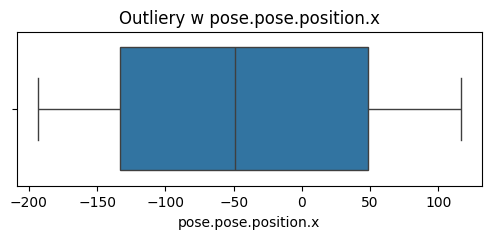

pose.pose.position.y: Z-score outliers = 0, IQR outliers = 0


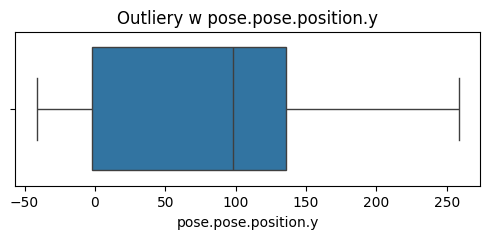

pose.pose.position.z: Z-score outliers = 0, IQR outliers = 0


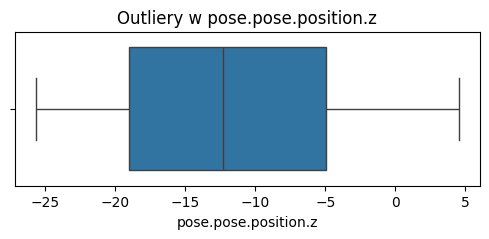

pose.pose.orientation.x: Z-score outliers = 0, IQR outliers = 0


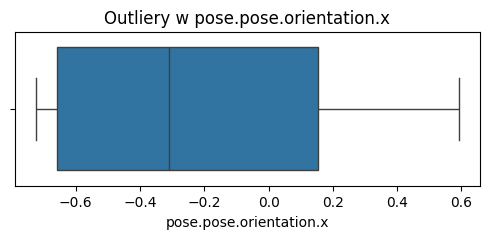

pose.pose.orientation.y: Z-score outliers = 0, IQR outliers = 0


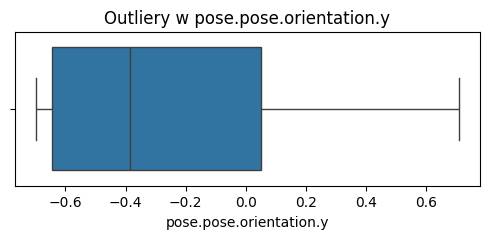

pose.pose.orientation.z: Z-score outliers = 0, IQR outliers = 0


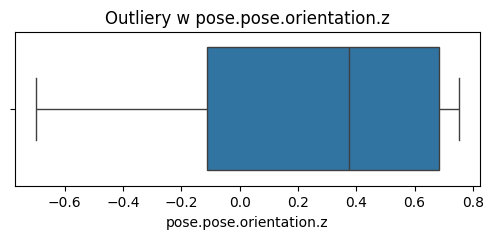

pose.pose.orientation.w: Z-score outliers = 0, IQR outliers = 0


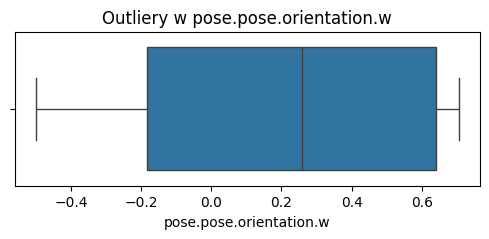

In [ ]:
#slam3


for col in drop_twist:
    z_scores = np.abs(stats.zscore(gps_df[col].dropna()))
    iqr = gps_df[col].quantile(0.75) - gps_df[col].quantile(0.25)
    lower_bound = gps_df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = gps_df[col].quantile(0.75) + 1.5 * iqr
    outliers_z = (z_scores > 3).sum()
    outliers_iqr = ((gps_df[col] < lower_bound) | (gps_df[col] > upper_bound)).sum()
    print(f"{col}: Z-score outliers = {outliers_z}, IQR outliers = {outliers_iqr}")

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=gps_df[col])
    plt.title(f'Outliery w {col}')
    plt.show()

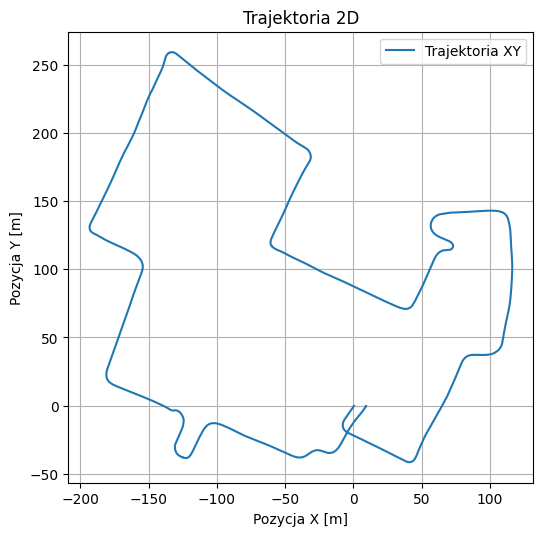

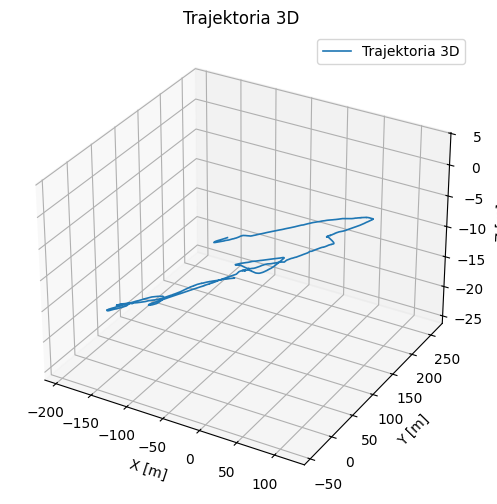

In [ ]:
#orb_slam3

import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



#

x = gps_df['pose.pose.position.x']
y = gps_df['pose.pose.position.y']
z = gps_df['pose.pose.position.z']

# --- Trajektoria 2D ---
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, linewidth=1.5, label='Trajektoria XY')
ax.set_aspect('equal', 'box')
ax.set_xlabel('Pozycja X [m]')
ax.set_ylabel('Pozycja Y [m]')
ax.set_title('Trajektoria 2D')
ax.legend(loc='upper right')
ax.grid(True)

# --- Trajektoria 3D ---
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(x, y, z, linewidth=1.2, label='Trajektoria 3D')
ax3.set_xlabel('X [m]')
ax3.set_ylabel('Y [m]')
ax3.set_zlabel('Z [m]')
ax3.set_title('Trajektoria 3D')
ax3.legend()

plt.show()

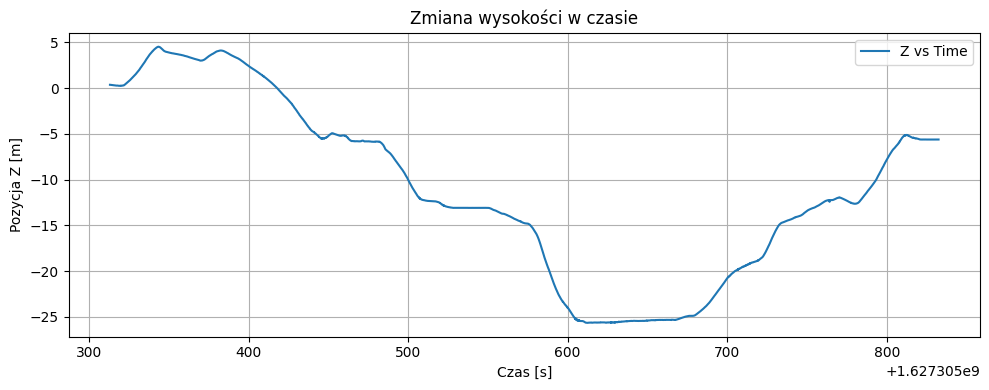

In [ ]:
import matplotlib.pyplot as plt



t = gps_df['Time']
z = gps_df['pose.pose.position.z']


fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(t, z, linewidth=1.5, label='Z vs Time')
ax.set_title('Zmiana wysokości w czasie')
ax.set_xlabel('Czas [s]')
ax.set_ylabel('Pozycja Z [m]')
ax.grid(True)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

# /orb_slam3_phone

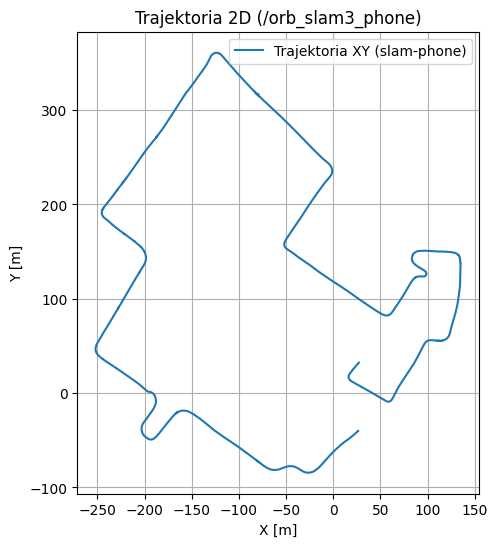

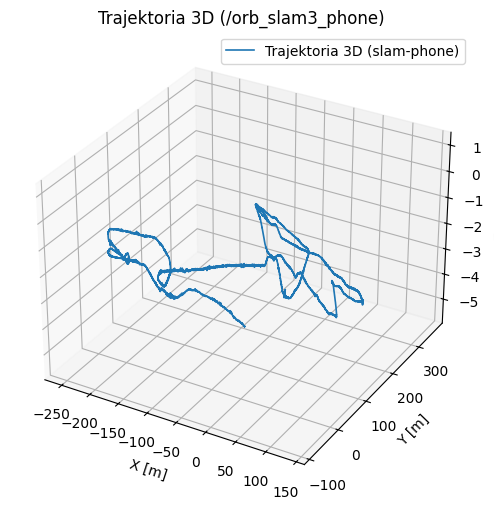

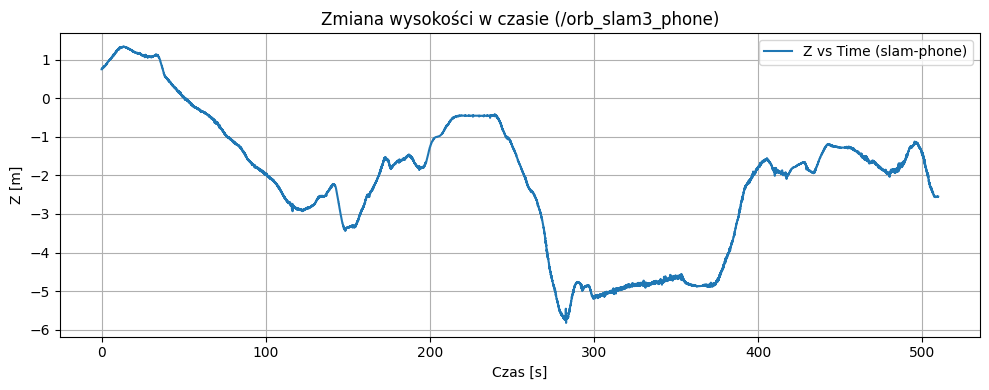

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



x = gps_slamphone_df['pose.pose.position.x']
y = gps_slamphone_df['pose.pose.position.y']
z = gps_slamphone_df['pose.pose.position.z']
t = gps_slamphone_df['Time']

t0 = t.iloc[0]
t_rel = t - t0

# --- Trajektoria 2D ---
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, linewidth=1.5, label='Trajektoria XY (slam-phone)')
ax.set_aspect('equal', 'box')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Trajektoria 2D (/orb_slam3_phone)')
ax.legend(loc='upper right')
ax.grid(True)
plt.show()

# --- Trajektoria 3D ---
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(x, y, z, linewidth=1.2, label='Trajektoria 3D (slam-phone)')
ax3.set_xlabel('X [m]')
ax3.set_ylabel('Y [m]')
ax3.set_zlabel('Z [m]')
ax3.set_title('Trajektoria 3D (/orb_slam3_phone)')
ax3.legend()
plt.show()

# --- Z vs czas ---
fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(t_rel, z, linewidth=1.5, label='Z vs Time (slam-phone)')
ax2.set_title('Zmiana wysokości w czasie (/orb_slam3_phone)')
ax2.set_xlabel('Czas [s]')
ax2.set_ylabel('Z [m]')
ax2.grid(True)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

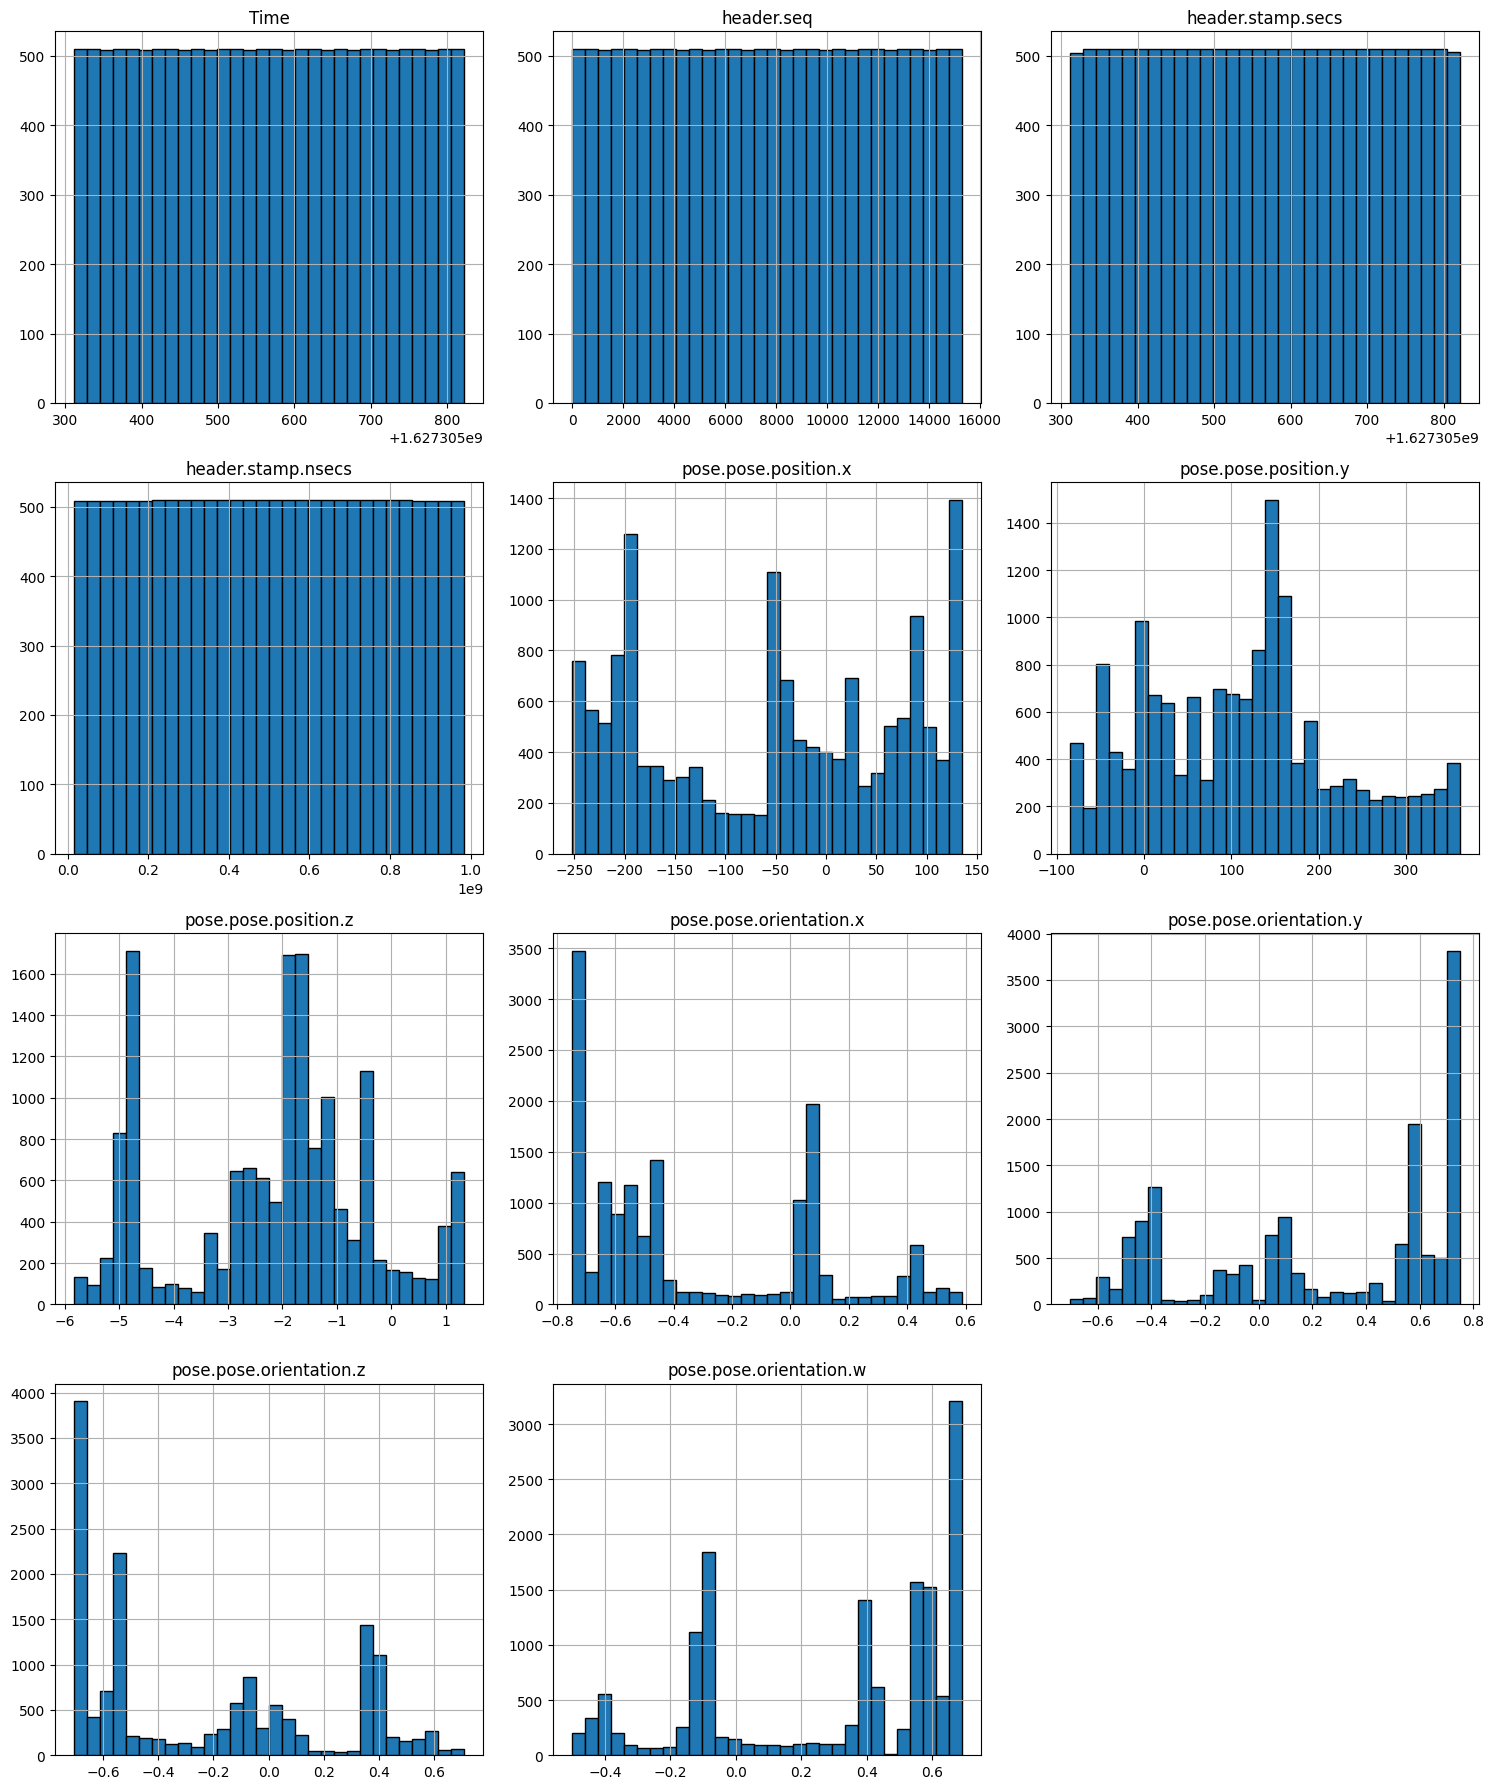

In [ ]:
#slamphone

numeric_cols = gps_slamphonedf.select_dtypes(include=['float64', 'int64']).columns
drop_twist = [col for col in numeric_cols if not col.startswith('twist')]

gps_slamphone_df[drop_twist].hist(figsize=(15, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

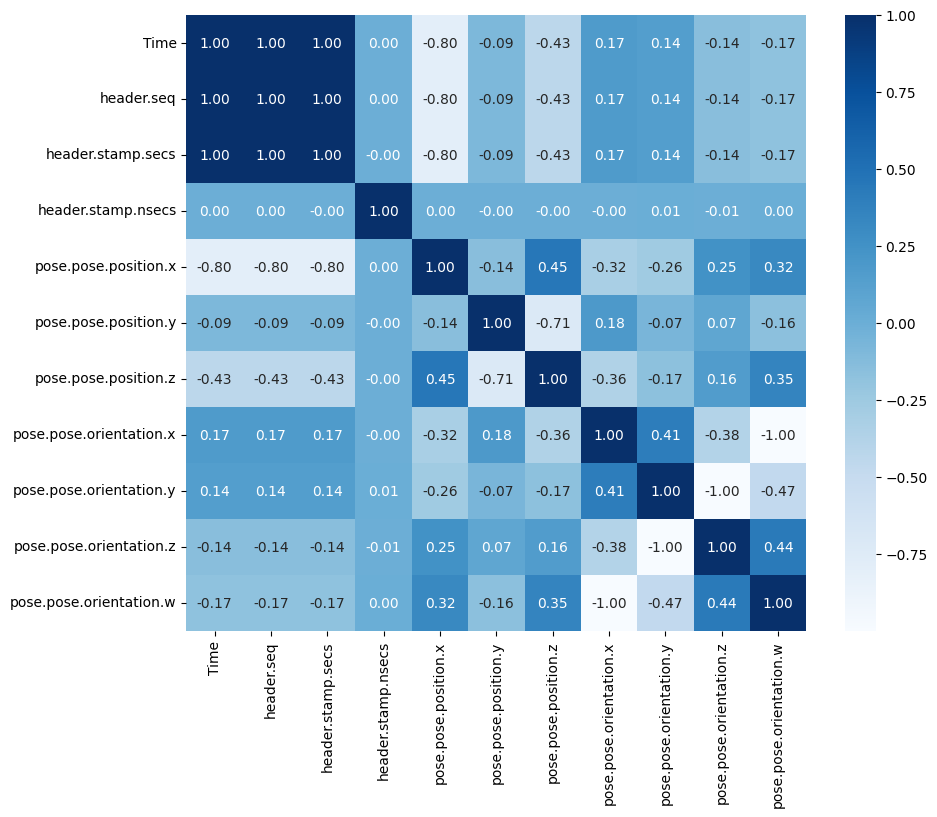

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(gps_slamphone_df[drop_twist].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [ ]:
gps_slamphone_csv_path = b.message_by_topic('/orb_slam3_phone')
gps_slamphone_df = pd.read_csv(gps_slamphone_csv_path)
gps_slamphone_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.627305e+09,0,1627305312,216779500,map,phone_camera,27.198745,32.367734,0.748070,0.091028,...,-0.672542,-0.154433,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.627305e+09,1,1627305312,250113000,map,phone_camera,27.177494,32.346690,0.762192,0.091197,...,-0.671550,-0.154721,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.627305e+09,2,1627305312,283446300,map,phone_camera,27.152788,32.313070,0.758604,0.090714,...,-0.671695,-0.155745,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.627305e+09,3,1627305312,316779600,map,phone_camera,27.128606,32.285670,0.757730,0.090459,...,-0.671876,-0.155949,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.627305e+09,4,1627305312,350113000,map,phone_camera,27.106910,32.255142,0.756818,0.090628,...,-0.671876,-0.156691,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
print("** Statystyki opisowe (numeryczne):\n", gps_slamphone_df.describe())
print("** Statystyki opisowe (nienumeryczne):\n", gps_slamphone_df.describe(include=['object']))

** Statystyki opisowe (numeryczne):
                Time    header.seq  header.stamp.secs  header.stamp.nsecs  \
count  1.529000e+04  15290.000000       1.529000e+04        1.529000e+04   
mean   1.627306e+09   7644.500000       1.627306e+09        5.001565e+08   
std    1.471329e+02   4413.987143       1.471331e+02        2.884217e+08   
min    1.627305e+09      0.000000       1.627305e+09        1.677940e+07   
25%    1.627305e+09   3822.250000       1.627305e+09        2.501130e+08   
50%    1.627306e+09   7644.500000       1.627306e+09        5.167794e+08   
75%    1.627306e+09  11466.750000       1.627306e+09        7.501130e+08   
max    1.627306e+09  15289.000000       1.627306e+09        9.834464e+08   

       pose.pose.position.x  pose.pose.position.y  pose.pose.position.z  \
count          15290.000000          15290.000000          15290.000000   
mean             -51.423061            112.231071             -2.136211   
std              125.641909            111.336892    

In [ ]:
print("** Liczba brakujących wartości:\n", gps_slamphone_df.isnull().sum())

** Liczba brakujących wartości:
 Time                       0
header.seq                 0
header.stamp.secs          0
header.stamp.nsecs         0
header.frame_id            0
child_frame_id             0
pose.pose.position.x       0
pose.pose.position.y       0
pose.pose.position.z       0
pose.pose.orientation.x    0
pose.pose.orientation.y    0
pose.pose.orientation.z    0
pose.pose.orientation.w    0
pose.covariance            0
twist.twist.linear.x       0
twist.twist.linear.y       0
twist.twist.linear.z       0
twist.twist.angular.x      0
twist.twist.angular.y      0
twist.twist.angular.z      0
twist.covariance           0
dtype: int64


In [ ]:
print("** Liczba wierszy:", len(gps_slamphone_df))
print("** Liczba kolumn:", gps_slamphone_df.shape[1])

print("** Typy danych:\n", gps_odom_df.dtypes)

** Liczba wierszy: 15290
** Liczba kolumn: 21
** Typy danych:
 Time                       float64
header.seq                   int64
header.stamp.secs            int64
header.stamp.nsecs           int64
header.frame_id             object
child_frame_id              object
pose.pose.position.x       float64
pose.pose.position.y       float64
pose.pose.position.z       float64
pose.pose.orientation.x    float64
pose.pose.orientation.y    float64
pose.pose.orientation.z    float64
pose.pose.orientation.w    float64
pose.covariance             object
twist.twist.linear.x       float64
twist.twist.linear.y       float64
twist.twist.linear.z       float64
twist.twist.angular.x      float64
twist.twist.angular.y      float64
twist.twist.angular.z      float64
twist.covariance            object
dtype: object


In [ ]:
print("** Liczba unikalnych wartości: \n", gps_slamphone_df.nunique())

** Liczba unikalnych wartości: 
 Time                       15290
header.seq                 15290
header.stamp.secs            510
header.stamp.nsecs            30
header.frame_id                1
child_frame_id                 1
pose.pose.position.x       15290
pose.pose.position.y       15290
pose.pose.position.z       15290
pose.pose.orientation.x    15290
pose.pose.orientation.y    15290
pose.pose.orientation.z    15290
pose.pose.orientation.w    15290
pose.covariance                1
twist.twist.linear.x           1
twist.twist.linear.y           1
twist.twist.linear.z           1
twist.twist.angular.x          1
twist.twist.angular.y          1
twist.twist.angular.z          1
twist.covariance               1
dtype: int64


Time: Z-score outliers = 0, IQR outliers = 0


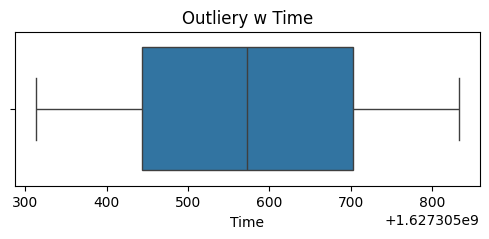

header.seq: Z-score outliers = 0, IQR outliers = 0


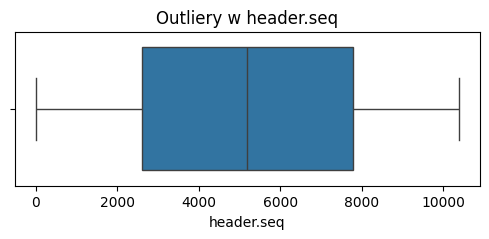

header.stamp.secs: Z-score outliers = 0, IQR outliers = 0


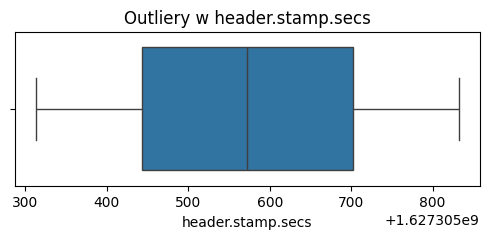

header.stamp.nsecs: Z-score outliers = 0, IQR outliers = 0


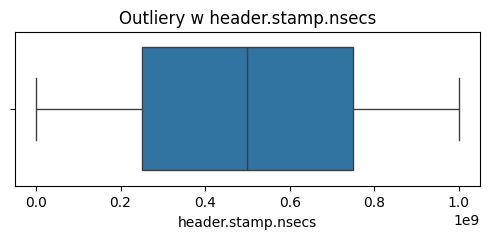

pose.pose.position.x: Z-score outliers = 0, IQR outliers = 0


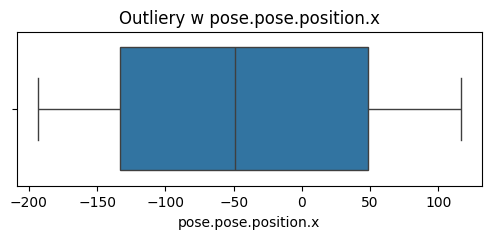

pose.pose.position.y: Z-score outliers = 0, IQR outliers = 0


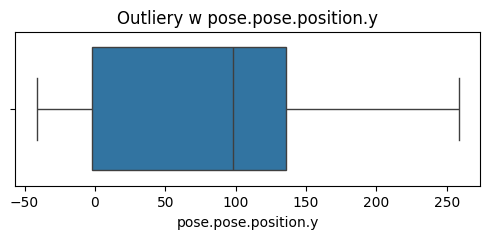

pose.pose.position.z: Z-score outliers = 0, IQR outliers = 0


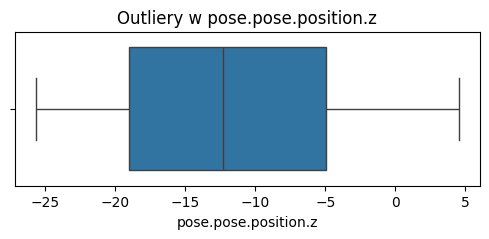

pose.pose.orientation.x: Z-score outliers = 0, IQR outliers = 0


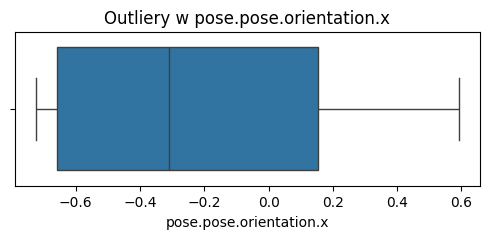

pose.pose.orientation.y: Z-score outliers = 0, IQR outliers = 0


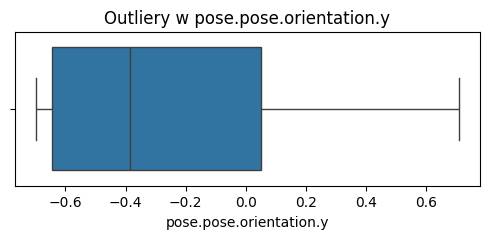

pose.pose.orientation.z: Z-score outliers = 0, IQR outliers = 0


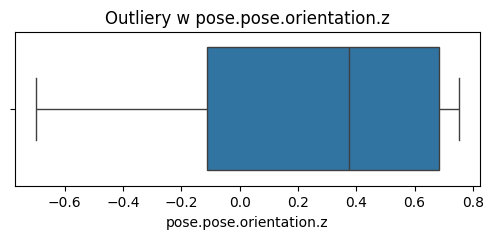

pose.pose.orientation.w: Z-score outliers = 0, IQR outliers = 0


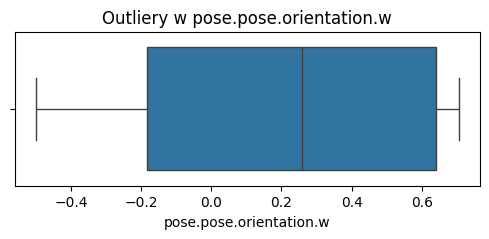

In [ ]:
#slamphone

for col in drop_twist:
    z_scores = np.abs(stats.zscore(gps_slamphone_df[col].dropna()))
    iqr = gps_slamphone_df[col].quantile(0.75) - gps_slamphone_df[col].quantile(0.25)
    lower_bound = gps_slamphone_df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = gps_slamphone_df[col].quantile(0.75) + 1.5 * iqr
    outliers_z = (z_scores > 3).sum()
    outliers_iqr = ((gps_slamphone_df[col] < lower_bound) | (gps_slamphone_df[col] > upper_bound)).sum()
    print(f"{col}: Z-score outliers = {outliers_z}, IQR outliers = {outliers_iqr}")

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=gps_df[col])
    plt.title(f'Outliery w {col}')
    plt.show()

# /gps_odom

In [ ]:
gps_odom_csv_path = b.message_by_topic('/gps_odom')
gps_odom_df = pd.read_csv(gps_odom_csv_path)
gps_odom_df.head()

,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,child_frame_id,pose.pose.position.x,pose.pose.position.y,pose.pose.position.z,pose.pose.orientation.x,...,pose.pose.orientation.z,pose.pose.orientation.w,pose.covariance,twist.twist.linear.x,twist.twist.linear.y,twist.twist.linear.z,twist.twist.angular.x,twist.twist.angular.y,twist.twist.angular.z,twist.covariance
0,1.627305e+09,122,1627305305,72763919,map,dgps_base,-0.000500,0.018536,0.0,0.0,...,-0.935884,-0.352309,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1.627305e+09,123,1627305305,194441080,map,dgps_base,-0.000500,0.018536,0.0,0.0,...,-0.935740,-0.352691,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1.627305e+09,124,1627305305,322031974,map,dgps_base,-0.011838,0.018230,0.0,0.0,...,-0.935569,-0.353145,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1.627305e+09,125,1627305305,445261001,map,dgps_base,-0.011838,0.018230,0.0,0.0,...,-0.936236,-0.351372,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1.627305e+09,126,1627305305,571917057,map,dgps_base,-0.000500,0.018536,0.0,0.0,...,-0.935725,-0.352730,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.0,0.0,0.0,0.0,0.0,0.0,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


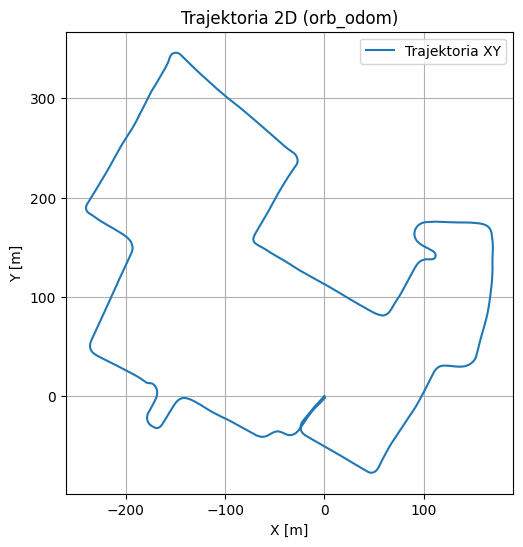

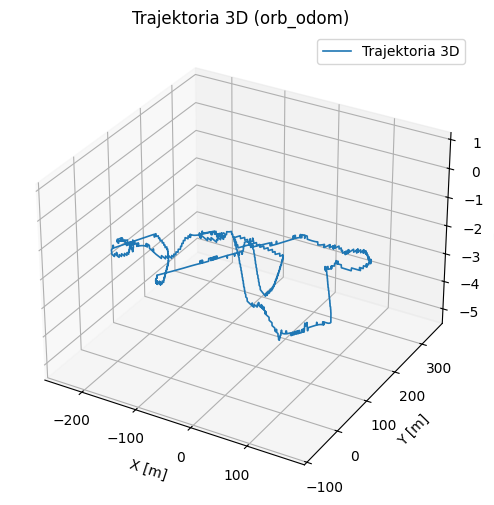

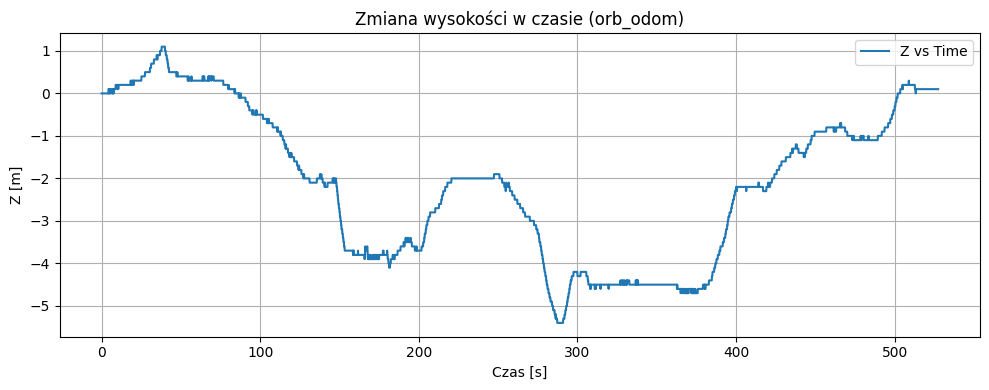

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D




x = gps_odom_df['pose.pose.position.x']
y = gps_odom_df['pose.pose.position.y']
z = gps_odom_df['pose.pose.position.z']
t = gps_odom_df['Time']

t0 = t.iloc[0]
t_rel = t - t0

# --- Trajektoria 2D ---
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, linewidth=1.5, label='Trajektoria XY')
ax.set_aspect('equal', 'box')
ax.set_xlabel('X [m]')
ax.set_ylabel('Y [m]')
ax.set_title('Trajektoria 2D (orb_odom)')
ax.legend(loc='upper right')
ax.grid(True)
plt.show()

# --- Trajektoria 3D ---
fig3 = plt.figure(figsize=(8,6))
ax3 = fig3.add_subplot(111, projection='3d')
ax3.plot(x, y, z, linewidth=1.2, label='Trajektoria 3D')
ax3.set_xlabel('X [m]')
ax3.set_ylabel('Y [m]')
ax3.set_zlabel('Z [m]')
ax3.set_title('Trajektoria 3D (orb_odom)')
ax3.legend()
plt.show()


fig2, ax2 = plt.subplots(figsize=(10,4))
ax2.plot(t_rel, z, linewidth=1.5, label='Z vs Time')
ax2.set_title('Zmiana wysokości w czasie (orb_odom)')
ax2.set_xlabel(f'Czas [s]')
ax2.set_ylabel('Z [m]')
ax2.grid(True)
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

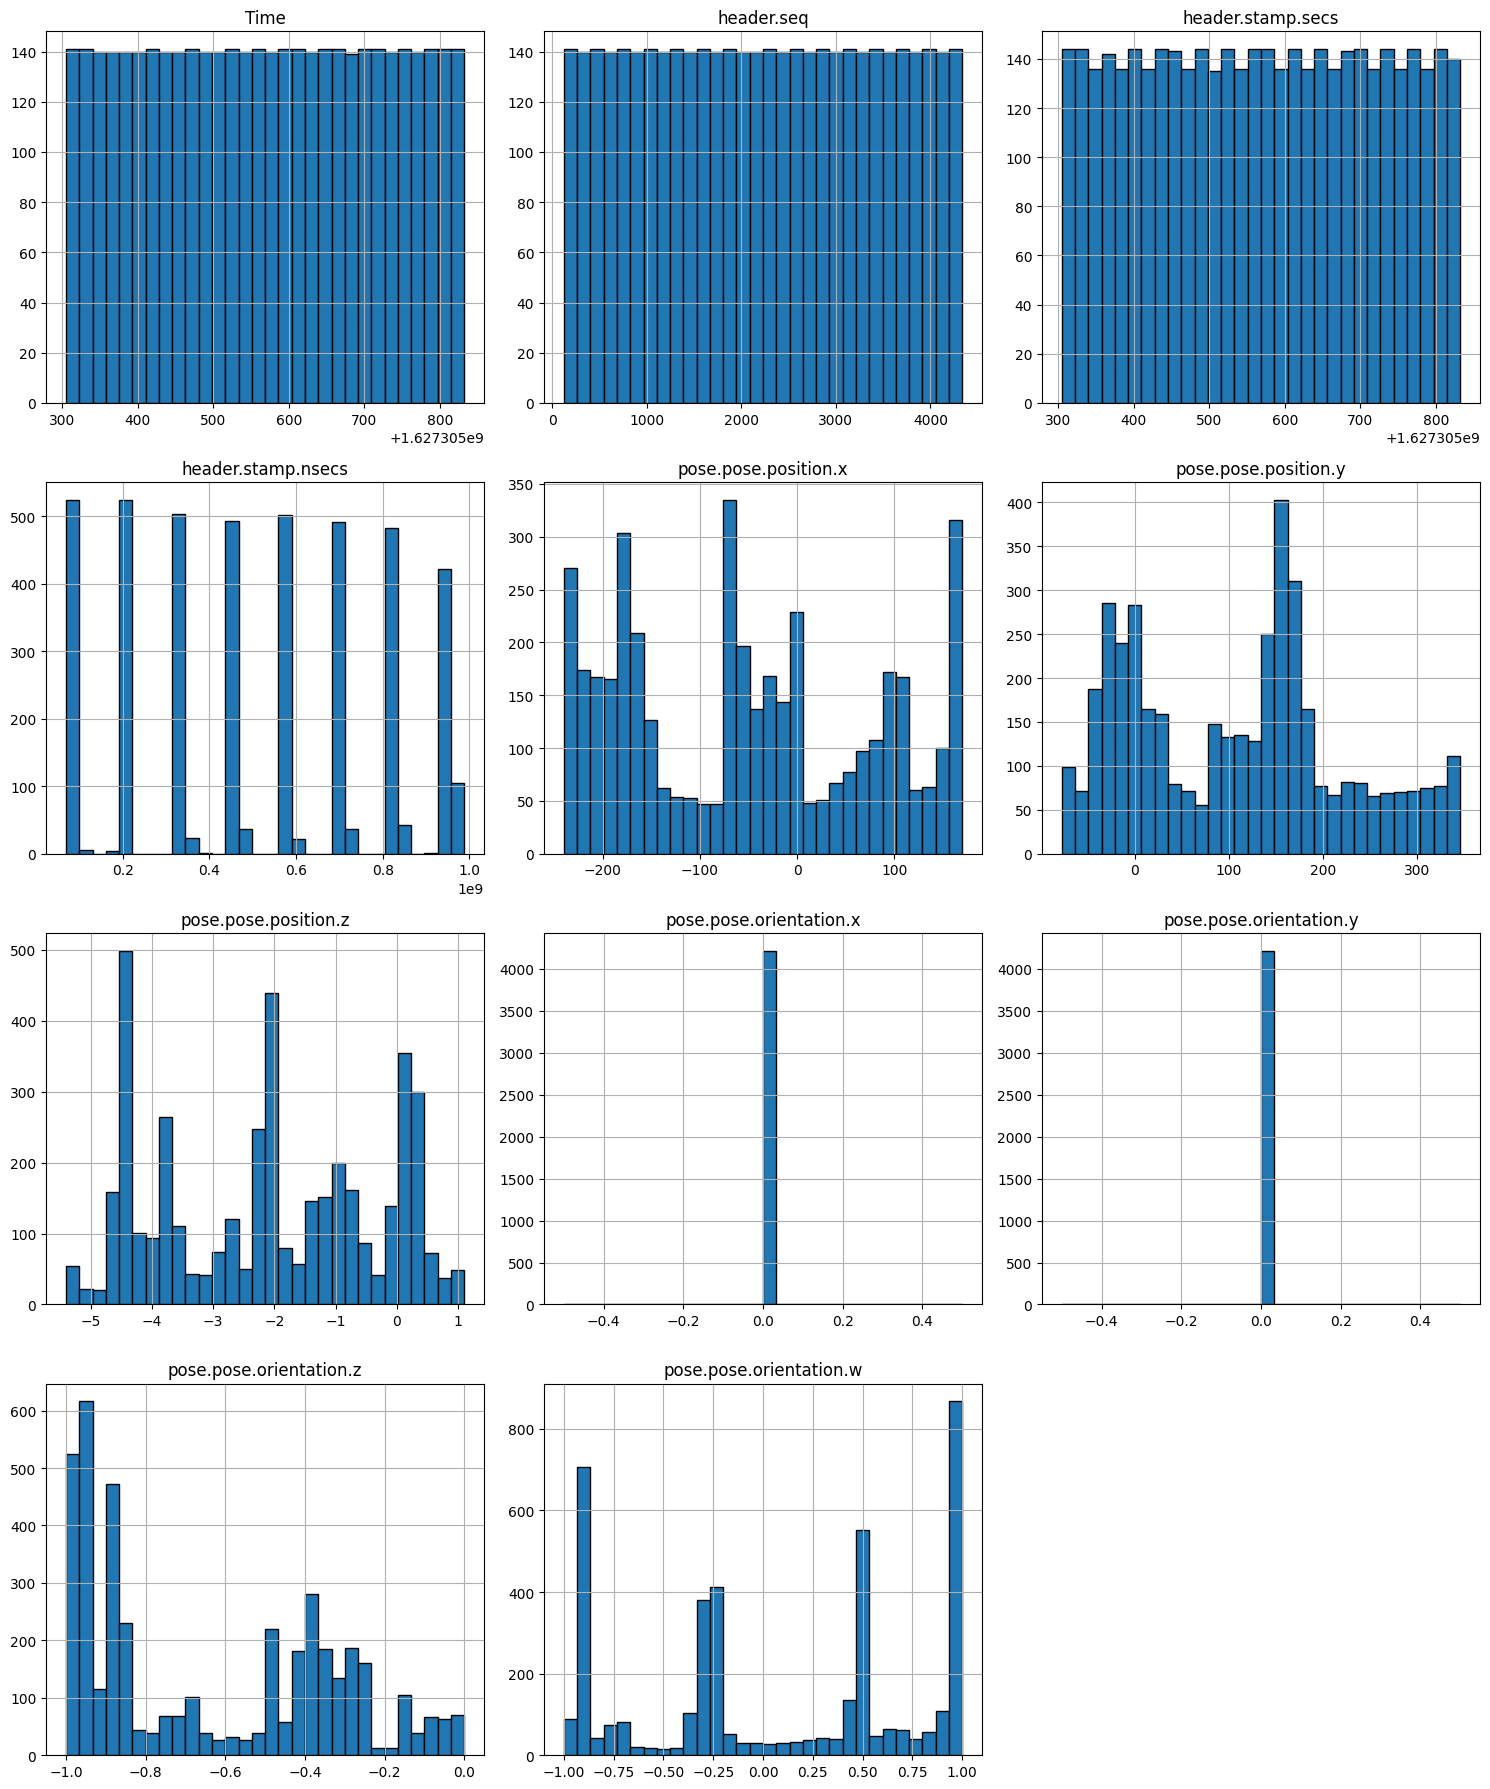

In [ ]:
#odom

numeric_cols = gps_odom_df.select_dtypes(include=['float64', 'int64']).columns
drop_twist = [col for col in numeric_cols if not col.startswith('twist')]

gps_odom_df[drop_twist].hist(figsize=(15, 18), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
print("** Liczba wierszy:", len(gps_odom_df))
print("** Liczba kolumn:", gps_odom_df.shape[1])

print("** Typy danych:\n", gps_odom_df.dtypes)


** Liczba wierszy: 4215
** Liczba kolumn: 21
** Typy danych:
 Time                       float64
header.seq                   int64
header.stamp.secs            int64
header.stamp.nsecs           int64
header.frame_id             object
child_frame_id              object
pose.pose.position.x       float64
pose.pose.position.y       float64
pose.pose.position.z       float64
pose.pose.orientation.x    float64
pose.pose.orientation.y    float64
pose.pose.orientation.z    float64
pose.pose.orientation.w    float64
pose.covariance             object
twist.twist.linear.x       float64
twist.twist.linear.y       float64
twist.twist.linear.z       float64
twist.twist.angular.x      float64
twist.twist.angular.y      float64
twist.twist.angular.z      float64
twist.covariance            object
dtype: object


In [ ]:
print("** Liczba brakujących wartości:\n", gps_odom_df.isnull().sum())

** Liczba brakujących wartości:
 Time                       0
header.seq                 0
header.stamp.secs          0
header.stamp.nsecs         0
header.frame_id            0
child_frame_id             0
pose.pose.position.x       0
pose.pose.position.y       0
pose.pose.position.z       0
pose.pose.orientation.x    0
pose.pose.orientation.y    0
pose.pose.orientation.z    0
pose.pose.orientation.w    0
pose.covariance            0
twist.twist.linear.x       0
twist.twist.linear.y       0
twist.twist.linear.z       0
twist.twist.angular.x      0
twist.twist.angular.y      0
twist.twist.angular.z      0
twist.covariance           0
dtype: int64


In [ ]:
print("** Liczba unikalnych wartości: \n", gps_odom_df.nunique())

** Liczba unikalnych wartości: 
 Time                       4215
header.seq                 4215
header.stamp.secs           528
header.stamp.nsecs         4147
header.frame_id               1
child_frame_id                1
pose.pose.position.x       3928
pose.pose.position.y       3928
pose.pose.position.z         66
pose.pose.orientation.x       1
pose.pose.orientation.y       1
pose.pose.orientation.z    4180
pose.pose.orientation.w    4180
pose.covariance               1
twist.twist.linear.x          1
twist.twist.linear.y          1
twist.twist.linear.z          1
twist.twist.angular.x         1
twist.twist.angular.y         1
twist.twist.angular.z         1
twist.covariance              1
dtype: int64


In [ ]:
print("** Statystyki opisowe (numeryczne):\n", gps_odom_df.describe())
print("** Statystyki opisowe (nienumeryczne):\n", gps_odom_df.describe(include=['object']))

** Statystyki opisowe (numeryczne):
                Time   header.seq  header.stamp.secs  header.stamp.nsecs  \
count  4.215000e+03  4215.000000       4.215000e+03        4.215000e+03   
mean   1.627306e+09  2229.000000       1.627306e+09        5.168118e+08   
std    1.522976e+02  1216.910021       1.522984e+02        2.853277e+08   
min    1.627305e+09   122.000000       1.627305e+09        6.890011e+07   
25%    1.627305e+09  1175.500000       1.627305e+09        2.203760e+08   
50%    1.627306e+09  2229.000000       1.627306e+09        4.781280e+08   
75%    1.627306e+09  3282.500000       1.627306e+09        7.295310e+08   
max    1.627306e+09  4336.000000       1.627306e+09        9.880500e+08   

       pose.pose.position.x  pose.pose.position.y  pose.pose.position.z  \
count           4215.000000           4215.000000           4215.000000   
mean             -49.822301            108.206219             -2.082112   
std              127.370633            111.604174             

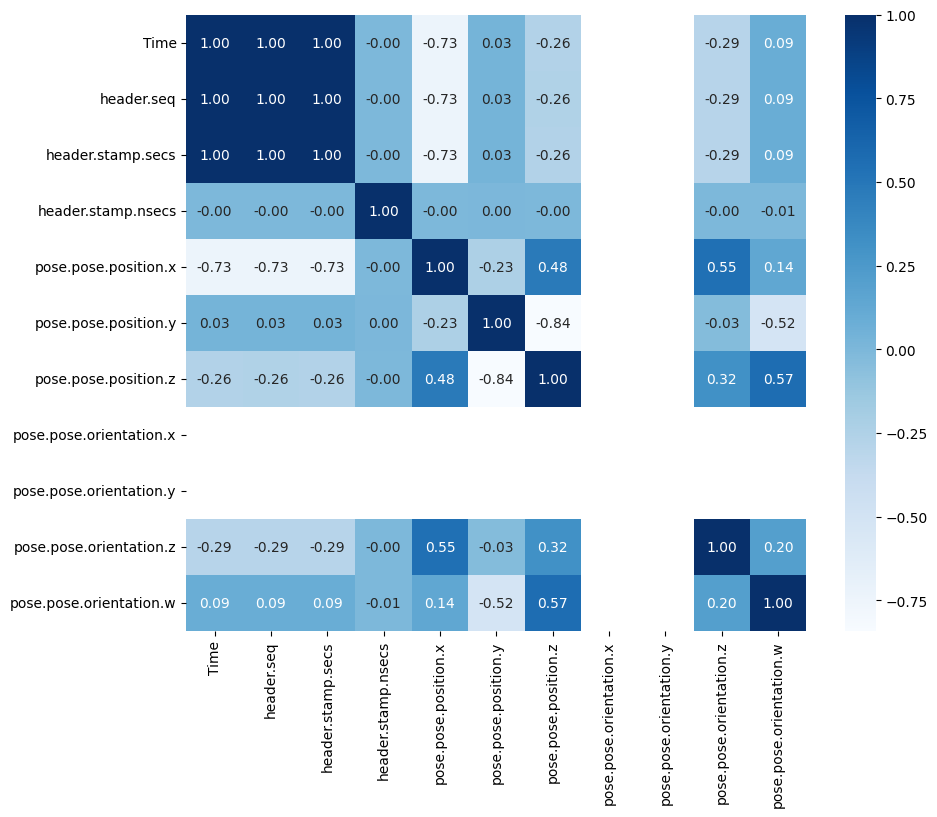

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(gps_odom_df[drop_twist].corr(), annot=True, cmap='Blues', fmt='.2f')
plt.show()

Time: Z-score outliers = 0, IQR outliers = 0


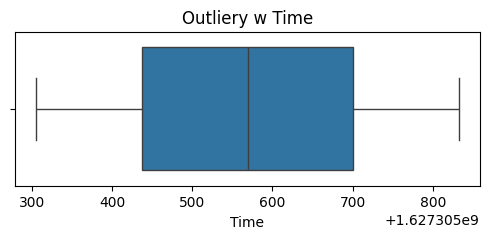

header.seq: Z-score outliers = 0, IQR outliers = 0


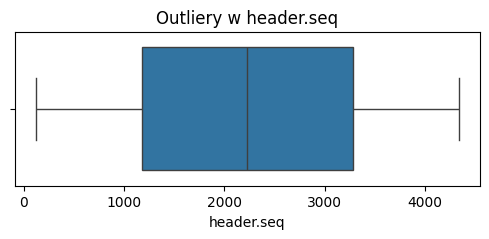

header.stamp.secs: Z-score outliers = 0, IQR outliers = 0


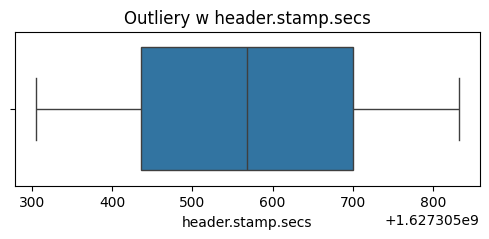

header.stamp.nsecs: Z-score outliers = 0, IQR outliers = 0


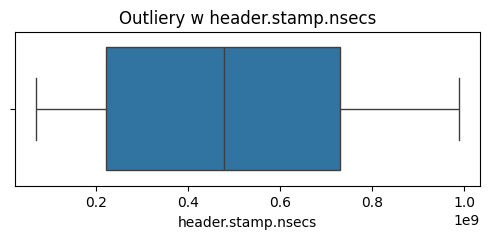

pose.pose.position.x: Z-score outliers = 0, IQR outliers = 0


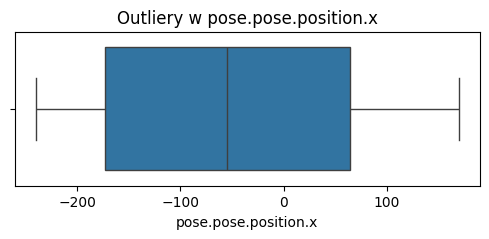

pose.pose.position.y: Z-score outliers = 0, IQR outliers = 0


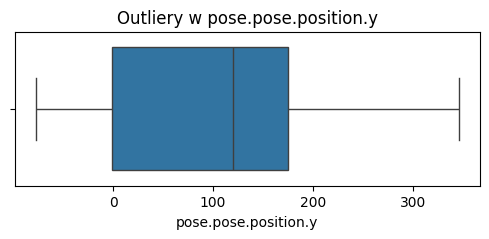

pose.pose.position.z: Z-score outliers = 0, IQR outliers = 0


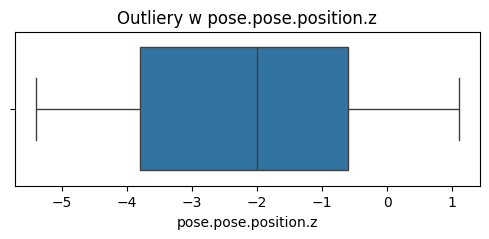

pose.pose.orientation.x: Z-score outliers = 0, IQR outliers = 0


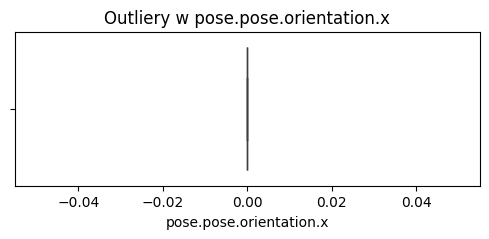

pose.pose.orientation.y: Z-score outliers = 0, IQR outliers = 0


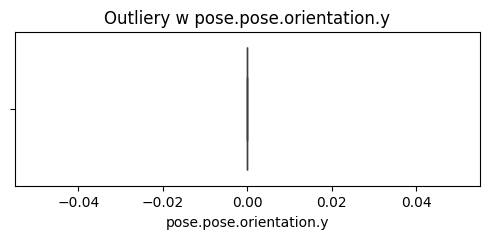

pose.pose.orientation.z: Z-score outliers = 0, IQR outliers = 0


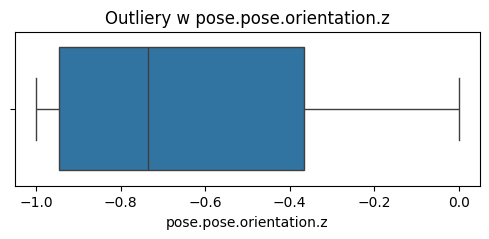

pose.pose.orientation.w: Z-score outliers = 0, IQR outliers = 0


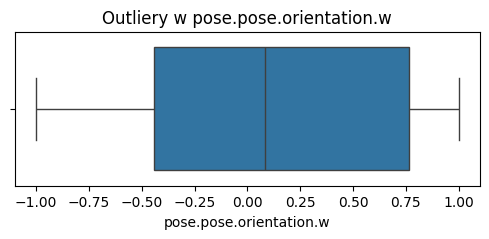

In [ ]:
for col in drop_twist:
    z_scores = np.abs(stats.zscore(gps_odom_df[col].dropna()))
    iqr = gps_odom_df[col].quantile(0.75) - gps_odom_df[col].quantile(0.25)
    lower_bound = gps_odom_df[col].quantile(0.25) - 1.5 * iqr
    upper_bound = gps_odom_df[col].quantile(0.75) + 1.5 * iqr
    outliers_z = (z_scores > 3).sum()
    outliers_iqr = ((gps_odom_df[col] < lower_bound) | (gps_odom_df[col] > upper_bound)).sum()
    print(f"{col}: Z-score outliers = {outliers_z}, IQR outliers = {outliers_iqr}")

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=gps_odom_df[col])
    plt.title(f'Outliery w {col}')
    plt.show()